In [1]:
# Credit Card Fraud Detection

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing dataset
df=pd.read_csv('C:/Users/Mahabub M Khan/OneDrive/Desktop/ML/Credit Card Fraud Detection/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# dataset shape
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
# checking null values( if any)
df.isnull().sum().any()

False

In [8]:
# Time analysis
df.Time.describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

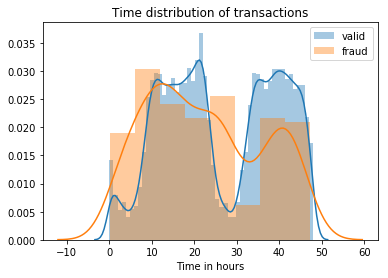

In [10]:
plt.Figure(figsize=(10,8))
sns.distplot(df[df.Class==0].Time/(60*60),label='valid')
sns.distplot(df[df.Class==1].Time/(60*60),label='fraud')
plt.legend(loc='upper right')
plt.xlabel('Time in hours')
plt.title('Time distribution of transactions')
plt.show()

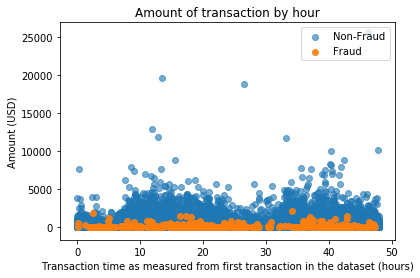

In [11]:
plt.scatter((df[df.Class==0].Time/(60*60)), df[df.Class==0].Amount,
            alpha=0.6,label='Non-Fraud')
plt.scatter((df[df.Class==1].Time/(60*60)), df[df.Class==1].Amount, 
            alpha=0.9, label='Fraud')
plt.title("Amount of transaction by hour")
plt.xlabel("Transaction time as measured from first transaction in the dataset (hours)")
plt.ylabel('Amount (USD)')
plt.legend(loc='upper right')
plt.show()

In [12]:
# Class column analysis
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

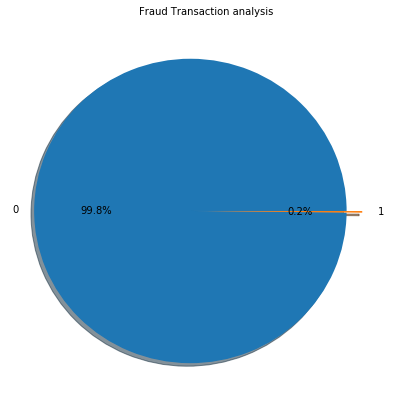

In [13]:
df.Class.value_counts()
# Class column Visualisation
labels= df.Class.value_counts().index
values=df.Class.value_counts().values
explode=[0.1,0]
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,shadow=True,autopct='%1.1f%%')
plt.title('Fraud Transaction analysis',color='black',fontsize=10)
plt.show()

In [14]:
# Amount analysis
df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

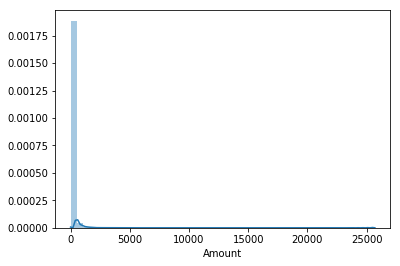

In [15]:
sns.distplot(df.Amount)

In [16]:
# Amount vs Class
print('Amount details of fraud transaction:\n',
      df[df.Class==1].Amount.describe())
print('Amount details of valid transaction:\n',
      df[df.Class==0].Amount.describe())

Amount details of fraud transaction:
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
Amount details of valid transaction:
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


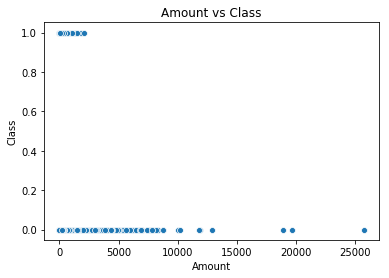

In [17]:
# Visualisation-1
plt.Figure(figsize=(15,10))
sns.scatterplot(df.Amount,df.Class)
plt.title('Amount vs Class')
plt.show()

C:\Users\Mahabub M Khan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


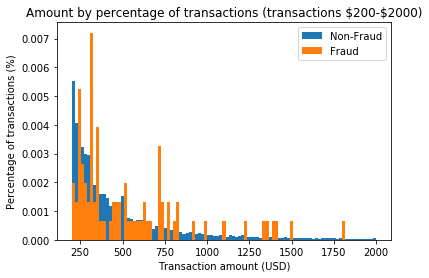

In [18]:
# Visualisation-2
bins = np.linspace(200, 2000, 100)
plt.hist(df[df.Class==0].Amount, bins, alpha=1, normed=True, label='Non-Fraud')
plt.hist(df[df.Class==1].Amount, bins, alpha=1, normed=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

In [19]:
# Correlation matrix
corr= df.corr()

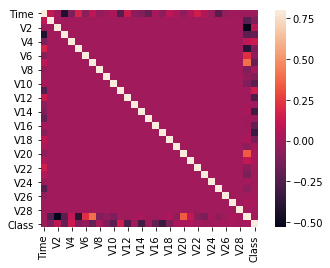

In [21]:
# heatmap of corrmat.
plt.Figure(figsize=(15,15))
sns.heatmap(corr,vmax=0.8,square=True)
plt.show()

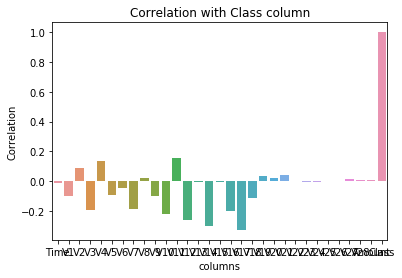

In [22]:
# Correlation with class
x= corr['Class'].index
y= corr.Class.values
plt.Figure(figsize=(15,10))
sns.barplot(x=x,y=y)
plt.xlabel('columns')
plt.ylabel('Correlation')
plt.title('Correlation with Class column')
plt.show()

In [23]:
# X and y separatin
X=df.drop(['Class'],axis=1)
y=df['Class']

In [24]:
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)

In [26]:
print('Normalized X:',X)

Normalized X: [[-1.99658302 -0.69424232 -0.04407492 ...  0.33089162 -0.06378115
   0.24496426]
 [-1.99658302  0.60849633  0.16117592 ... -0.02225568  0.04460752
  -0.34247454]
 [-1.99656197 -0.69350046 -0.81157783 ... -0.13713686 -0.18102083
   1.16068593]
 ...
 [ 1.6419735   0.98002374 -0.18243372 ...  0.01103672 -0.0804672
  -0.0818393 ]
 [ 1.6419735  -0.12275539  0.32125034 ...  0.26960398  0.31668678
  -0.31324853]
 [ 1.64205773 -0.27233093 -0.11489898 ... -0.00598394  0.04134999
   0.51435531]]


In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [28]:
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (227845, 30)
Shape of X_test: (56962, 30)
Shape of y_train: (227845,)
Shape of y_test: (56962,)


In [29]:
# Model-1
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100,criterion ='entropy', 
                                    random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [30]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [31]:
# Result Evaluation
# import libraries
from sklearn.metrics import classification_report,accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 

In [32]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.93      0.79      0.86       101

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [34]:
results= pd.DataFrame([['Random Forest',acc,prec,rec,f1]],
                        columns=['Model','Accuracy score','Precision Score',
                                 'Recall score','F1 score'])

In [35]:
# Model-2
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [36]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [37]:
# Evaluation
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.89      0.79      0.84       101

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [39]:
result2= pd.DataFrame([['XGBoost',acc,prec,rec,f1]],
                        columns=['Model','Accuracy score','Precision Score',
                                 'Recall score','F1 score'])

In [40]:
results=results.append(result2,ignore_index=True)

In [41]:
# Model-3
# ANN
# Importing libraries 
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [42]:
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 15, init = 'uniform', 
                     activation = 'relu', input_dim = 30))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 15, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 32, nb_epoch = 100)

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\Mahabub M Khan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=15, kernel_initializer="uniform")`
  """
C:\Users\Mahabub M Khan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=15, kernel_initializer="uniform")`
  import sys
C:\Users\Mahabub M Khan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  if __name__ == '__main__':


Instructions for updating:
Use tf.cast instead.


C:\Users\Mahabub M Khan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
227845/227845 [==============================] - 11s 50us/step - loss: 0.0136 - accuracy: 0.9986
Epoch 2/100
227845/227845 [==============================] - 11s 50us/step - loss: 0.0034 - accuracy: 0.9994
Epoch 3/100
227845/227845 [==============================] - 10s 44us/step - loss: 0.0030 - accuracy: 0.9994
Epoch 4/100
227845/227845 [==============================] - 11s 47us/step - loss: 0.0028 - accuracy: 0.9994
Epoch 5/100
227845/227845 [==============================] - 10s 46us/step - loss: 0.0028 - accuracy: 0.9994
Epoch 6/100
227845/227845 [==============================] - 10s 45us/step - loss: 0.0027 - accuracy: 0.9994
Epoch 7/100
227845/227845 [==============================] - 10s 44us/step - loss: 0.0026 - accuracy: 0.9994
Epoch 8/100
227845/227845 [==============================] - 11s 46us/step - loss: 0.0026 - accuracy: 0.9994
Epoch 9/100
227845/227845 [==============================] - 11s 49us/step - loss: 0.0025 - accuracy: 0.9994
Epoch 10/100
227845

In [43]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [44]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.86      0.81      0.84       101

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [46]:
result3= pd.DataFrame([['ANN',acc,prec,rec,f1]],
                        columns=['Model','Accuracy score','Precision Score',
                                 'Recall score','F1 score'])

In [47]:
results=results.append(result3,ignore_index=True)

In [49]:
print('Evaluation Results of all models:\n',results)

Evaluation Results of all models:
            Model  Accuracy score  Precision Score  Recall score  F1 score
0  Random Forest        0.999526         0.930233      0.792079  0.855615
1        XGBoost        0.999456         0.888889      0.792079  0.837696
2            ANN        0.999438         0.863158      0.811881  0.836735


Hence, **Random Forest** is the most accurate model for having highest *Accuracy score* and *F1 score*.